In [91]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("ticks")
sns.set_context('notebook')
import curveball

In [92]:
folder = os.path.join("..","..","data","dorith")
fn = os.path.join("20140911_dorit_hsp90_ypd_20140901", "plate_17_OD")

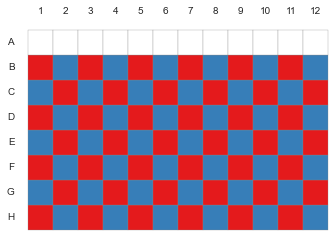

In [93]:
plate = pd.read_csv('../plate_templates/checkerboard.csv')
curveball.plots.plot_plate(plate);

In [94]:
print fn
df = curveball.ioutils.read_tecan_mat(os.path.join(folder, fn), plate=plate)
df.head()

20140911_dorit_hsp90_ypd_20140901\plate_17_OD


,Cycle Nr.,Time,Well,OD,Row,Col,Strain,Color
0,1,0.000000,A1,0.0662,A,1,0,#ffffff
1,2,0.998611,A1,0.0659,A,1,0,#ffffff
2,3,1.998333,A1,0.0658,A,1,0,#ffffff
3,4,2.999722,A1,0.0659,A,1,0,#ffffff
4,5,3.998889,A1,0.0655,A,1,0,#ffffff


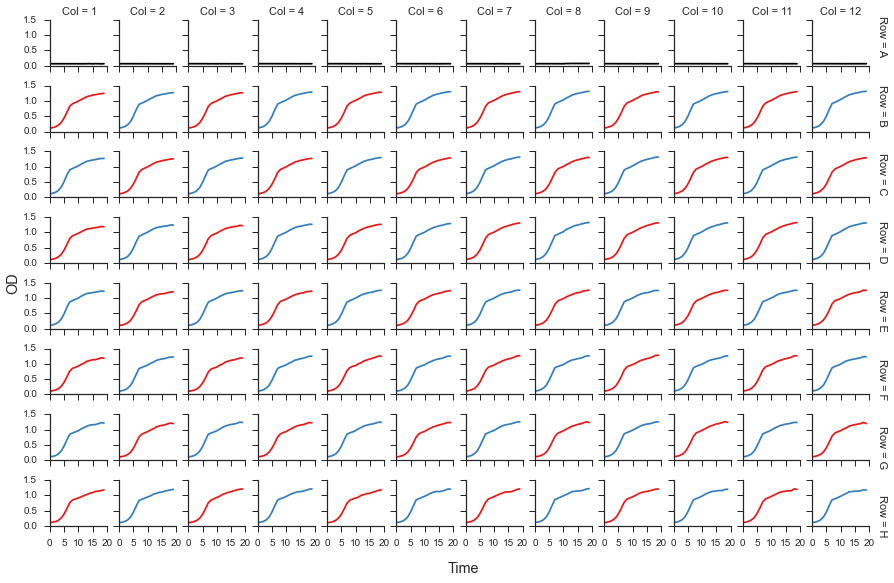

In [95]:
curveball.plots.plot_wells(df);

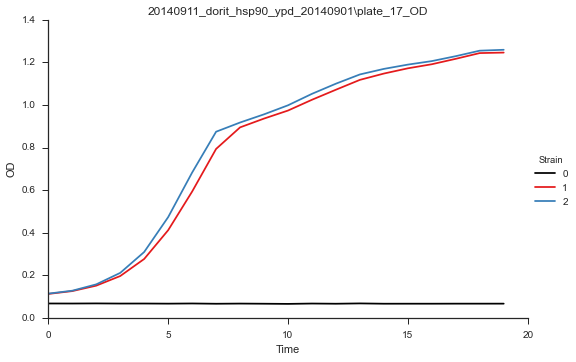

In [96]:
g = curveball.plots.plot_strains(df)
g.axes[0,0].set_title(fn);

In [97]:
df1 = df[df.Strain == 1]
df2 = df[df.Strain == 2]
color1 = df.Color[df.Strain == 1].unique()[0]
color2 = df.Color[df.Strain == 2].unique()[0]

[[Model]]
    Model(richards_function)
[[Fit Statistics]]
    # function evals   = 180
    # data points      = 20
    # variables        = 4
    chi-square         = 161.491
    reduced chi-square = 10.093
[[Variables]]
    y0:   0.09661609 +/- 0.005789 (5.99%) (init= 0.1122095)
    r:    0.28934389 +/- 0.022730 (7.86%) (init= 0.1021708)
    K:    1.15345982 +/- 0.045806 (3.97%) (init= 1.246426)
    nu:   3.09282667 +/- 1.548755 (50.08%) (init= 1)



20

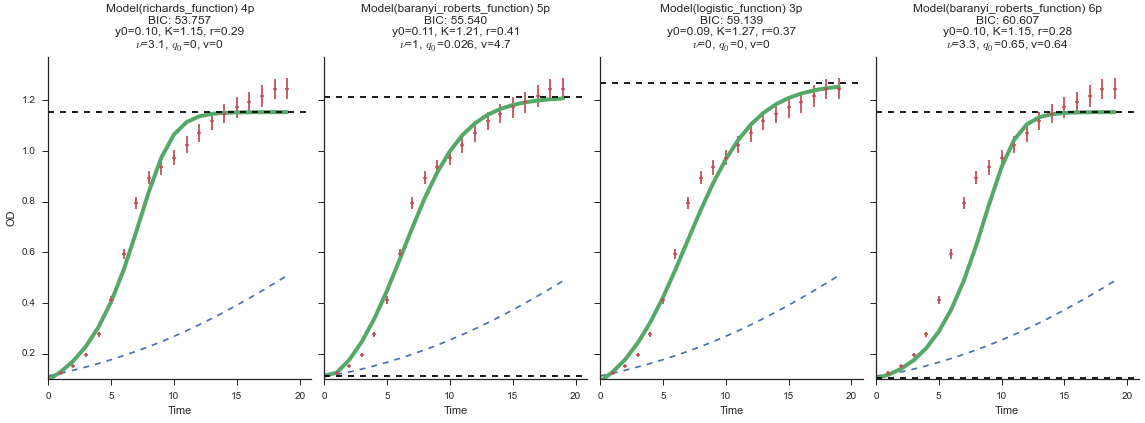

In [98]:
models1,fig,ax = curveball.models.fit_model(df1, PLOT=True, PRINT=True)
len(models1[0].userkws['t'])

In [99]:
print "has lag:", curveball.models.has_lag(models1, PRINT=False)
print "lag:", curveball.models.find_lag(models1[0], PLOT=False)
print "has nu:", curveball.models.has_nu(models1, PRINT=False)
print "nu:", models1[0].params['nu'].value if 'nu' in models1[0].params else 1
print "mu:", curveball.models.find_max_growth(models1[0], PLOT=False)[-1]

has lag: False
lag: 3.20561476924
has nu: Tested H0: Model(logistic_function) (nu=1) vs. H1: Model(richards_function) (nu=3.1); D=8.4, ddf=1, p-value=0.0038
True
nu: 3.09282667346
mu: 0.293218922716


[[Model]]
    Model(baranyi_roberts_function)
[[Fit Statistics]]
    # function evals   = 2425
    # data points      = 20
    # variables        = 6
    chi-square         = 50.125
    reduced chi-square = 3.580
[[Variables]]
    y0:   0.11478594 +/- 0.003359 (2.93%) (init= 0.1137119)
    r:    796.910591 +/- 1.19e+06 (149114.55%) (init= 0.1185667)
    K:    1.19122205 +/- 0.031617 (2.65%) (init= 1.259574)
    nu:   0.00053452 +/- 0.797642 (149224.94%) (init= 1)
    q0:   0.05869955 +/- 0.044834 (76.38%) (init= 1)
    v:    1.01598816 +/- 0.305273 (30.05%) (init= 1)



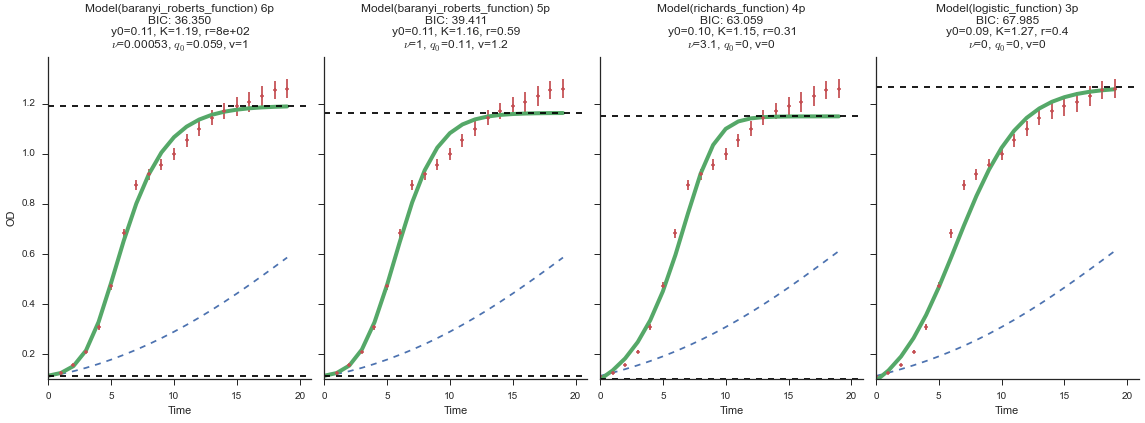

In [100]:
models2,fig,ax = curveball.models.fit_model(df2, PLOT=True, PRINT=True)

In [101]:
print "has lag:", curveball.models.has_lag(models2, PRINT=False)
print "lag:", curveball.models.find_lag(models2[0], PLOT=False)
print "has nu:", curveball.models.has_nu(models2, PRINT=False)
print "nu:", models2[0].params['nu'].value
print "mu:", curveball.models.find_max_growth(models2[0], PLOT=False)[-1]

has lag: True
lag: 2.71863456852
has nu: Tested H0: Model(baranyi_roberts_function) (nu=1) vs. H1: Model(baranyi_roberts_function) (nu=0.00053); D=6.1, ddf=1, p-value=0.014
True
nu: 0.00053452342374
mu: 0.424131335416


In [102]:
results = pd.DataFrame([{k:v.value for k,v in models1[0].params.items()}, {k:v.value for k,v in models2[0].params.items()}])
results['lag'] = [curveball.models.find_lag(models1[0], PLOT=False), curveball.models.find_lag(models2[0], PLOT=False)]
results['mu'] = [curveball.models.find_max_growth(models1[0], PLOT=False)[-1], curveball.models.find_max_growth(models2[0], PLOT=False)[-1]]
results['Strain'] = [1,2]

results

,K,nu,q0,r,v,y0,lag,mu,Strain
0,1.153460,3.092827,NaN,0.289344,NaN,0.096616,3.205615,0.293219,1
1,1.191222,0.000535,0.0587,796.910592,1.015988,0.114786,2.718635,0.424131,2


In [103]:
results = pd.melt(results, id_vars='Strain', var_name='Parameter', value_name='Value')
results.head()

,Strain,Parameter,Value
0,1,K,1.153460
1,2,K,1.191222
2,1,nu,3.092827
3,2,nu,0.000535
4,1,q0,NaN


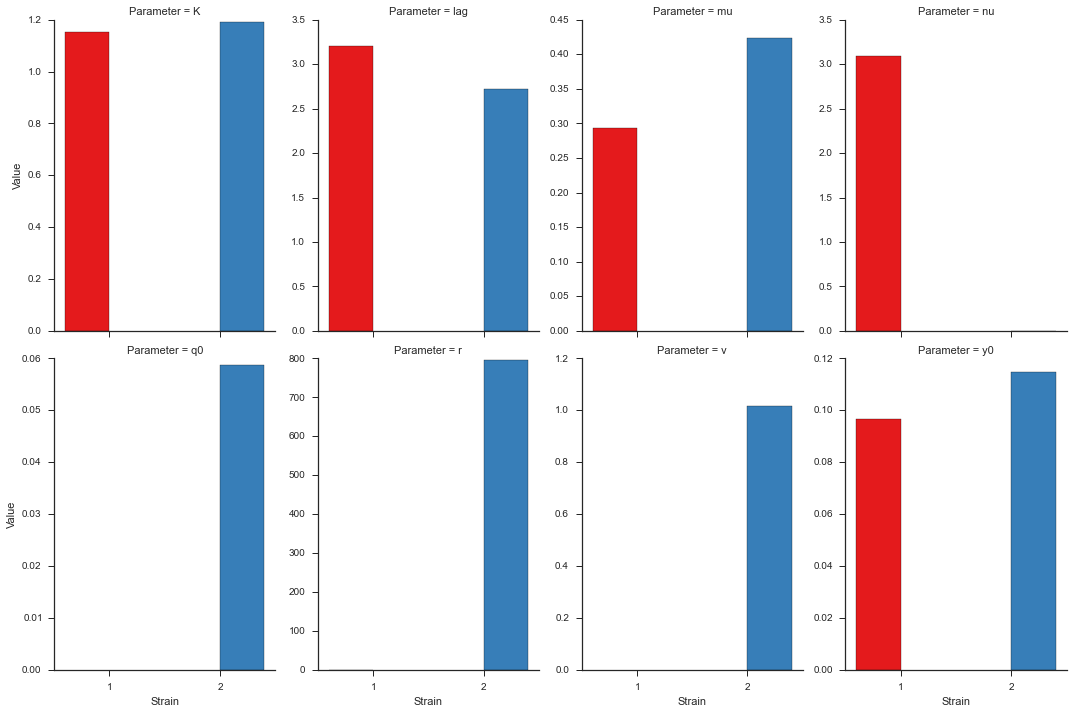

In [104]:
g = sns.factorplot(x='Strain', y='Value', kind="bar", data=results, col='Parameter', col_wrap=4,
               palette=[color1, color2], hue_order=[1,2],  aspect=.75,
               sharex=True, sharey=False, hue='Strain')

## Competition

In [107]:
reload(curveball.competitions)

<module 'curveball.competitions' from 'd:\workspace\curveball_project\python\curveball\competitions.py'>

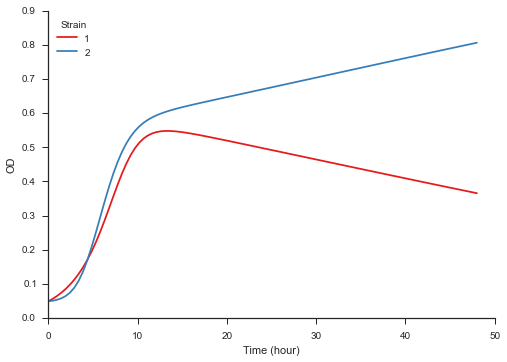

In [108]:
t,y,fig,ax = curveball.competitions.compete(models1[0], models2[0], hours=48, PLOT=True)
ax.lines[0].set_color(color1)
ax.lines[1].set_color(color2)
ax.legend([1,2], title='Strain', loc='upper left');

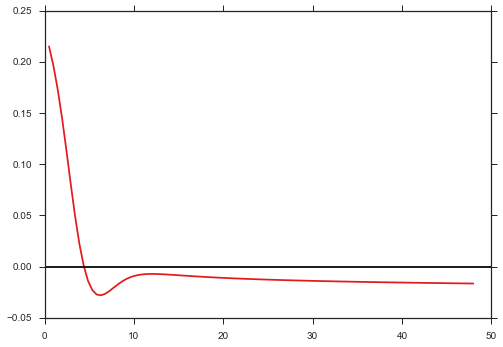

In [109]:
p = y[:,0]/y.sum(axis=1)
q = 1 - p
s = 1/t * np.log(p*q[0]/(p[0]*q))
plt.plot(t, s, color=color1)
plt.axhline(y=0, color='k')